Test the functions defined in the `src` package.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import imageio as io

import matplotlib.pyplot as plt
import torch
from torchvision.utils import make_grid

import src

In [3]:
src.utils.general.set_seed(0)

# Data

In [4]:
# Dataset and dataloader
datadir = "../data/dataset/"
datasets, dataloaders = {}, {}
for split in ['train', 'valid']:
    datasets[split] = src.data.images.ImagesDataset(datadir + split)
    dataloaders[split] = torch.utils.data.DataLoader(datasets[split], batch_size=2, 
                                                     collate_fn=src.data.images.pad_collate_fn,
    shuffle=True if split == 'train' else False)

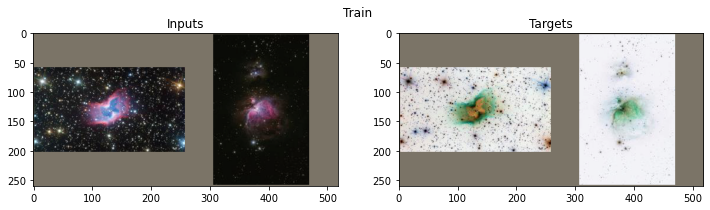

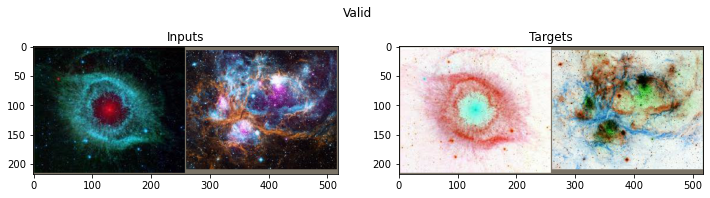

In [26]:
# Visualize
def to_image_grid(tensor):
    grid = make_grid(tensor)
    grid = grid.permute(1, 2, 0).detach().cpu().numpy()
    grid = src.utils.image.reverse_normalize(grid)
    return grid
    
for split in ['train', 'valid']:
    for batch in dataloaders[split]:
        images, targets = batch
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
        fig.suptitle(split.capitalize())
        grid = to_image_grid(images)
        ax1.imshow(grid)
        ax1.set_title("Inputs")
        grid = to_image_grid(targets)
        ax2.imshow(grid)
        ax2.set_title("Targets")
        break

# Model

In [6]:
model = src.model.Model()
print(model)

Model(
  (conv): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


# Training

In [7]:
loss_fn = src.train.loss.get_MSELoss_fn()
optimizer = src.train.optimizer.get_optimizer(model, lr=0.1)
metric_fn = {"mse": src.test.metric.get_metric_fn()}

In [8]:
history = src.train.train(model, dataloaders, loss_fn, optimizer, 10, metric_fns=metric_fn)

Epoch 0/9: Train loss=2.254482 - mse=2.254482 Valid loss=0.636010 - mse=0.636010 
Epoch 1/9: Train loss=0.850978 - mse=0.850978 Valid loss=0.791699 - mse=0.791699 
Epoch 2/9: Train loss=0.533803 - mse=0.533803 Valid loss=0.557644 - mse=0.557644 
Epoch 3/9: Train loss=0.471672 - mse=0.471672 Valid loss=0.483890 - mse=0.483890 
Epoch 4/9: Train loss=0.277014 - mse=0.277014 Valid loss=0.220700 - mse=0.220700 
Epoch 5/9: Train loss=0.218460 - mse=0.218460 Valid loss=0.196930 - mse=0.196930 
Epoch 6/9: Train loss=0.149452 - mse=0.149452 Valid loss=0.186590 - mse=0.186590 
Epoch 7/9: Train loss=0.134233 - mse=0.134233 Valid loss=0.116682 - mse=0.116682 
Epoch 8/9: Train loss=0.098732 - mse=0.098732 Valid loss=0.069702 - mse=0.069702 
Epoch 9/9: Train loss=0.104003 - mse=0.104003 Valid loss=0.035450 - mse=0.035450 
Training took 0h 00min 01s.


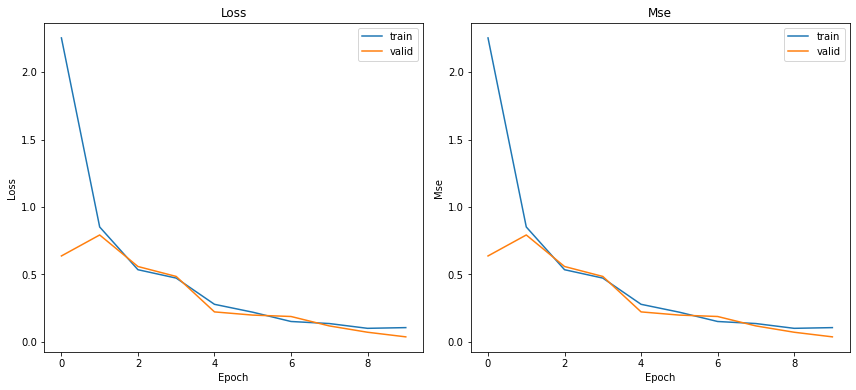

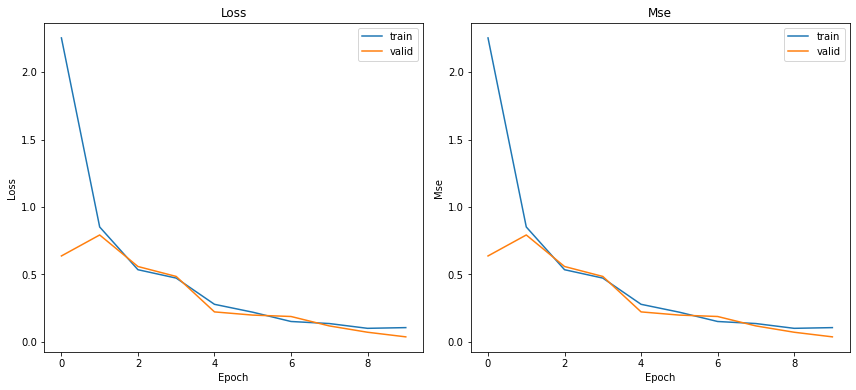

In [9]:
src.utils.visualization.plot_train(history)

# Evaluate

In [24]:
model.eval()
results = src.test.evaluate_dataloader(model, dataloaders['valid'], metric_fn)
print(results)

{'mse': 0.035449644550681114}


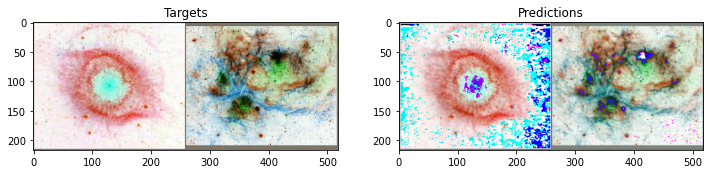

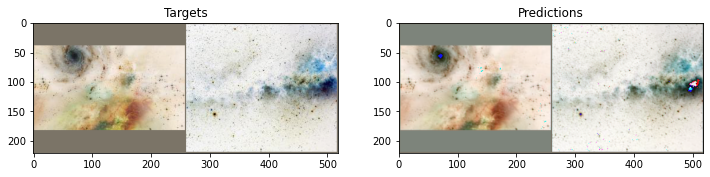

In [27]:
model.eval()
for batch in dataloaders['valid']:
    inputs, targets = batch
    preds = model(inputs)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
    grid = to_image_grid(targets)
    ax1.imshow(grid)
    ax1.set_title("Targets")
    grid = to_image_grid(preds)
    ax2.imshow(grid)
    ax2.set_title("Predictions")